# Librerias

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler
plt.rcParams['font.family'] = 'DejaVu Sans'

import warnings
warnings.filterwarnings('ignore')

# Datos de prueba

In [23]:
df_country = pd.read_csv('/root/Platzi/CurClus/data/Country-data.csv')

# Exploración y limpieza de datos

In [24]:
df_country.shape

(167, 10)

In [25]:
df_country.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [26]:
df_country.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

<Axes: >

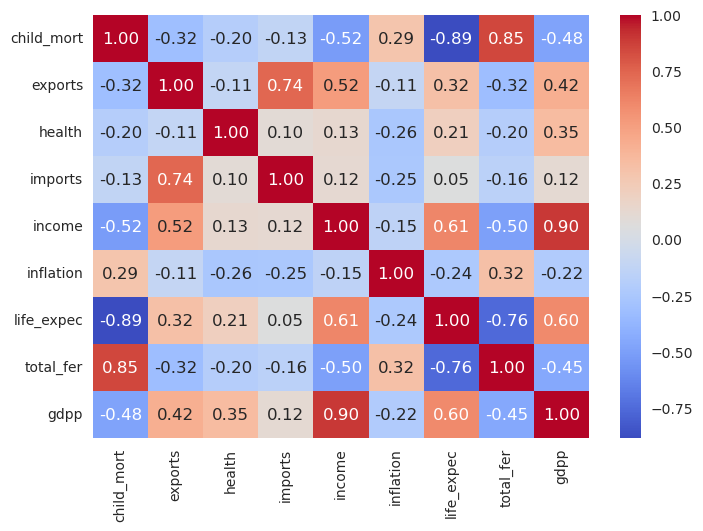

In [27]:
sns.heatmap(df_country.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')

In [28]:
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

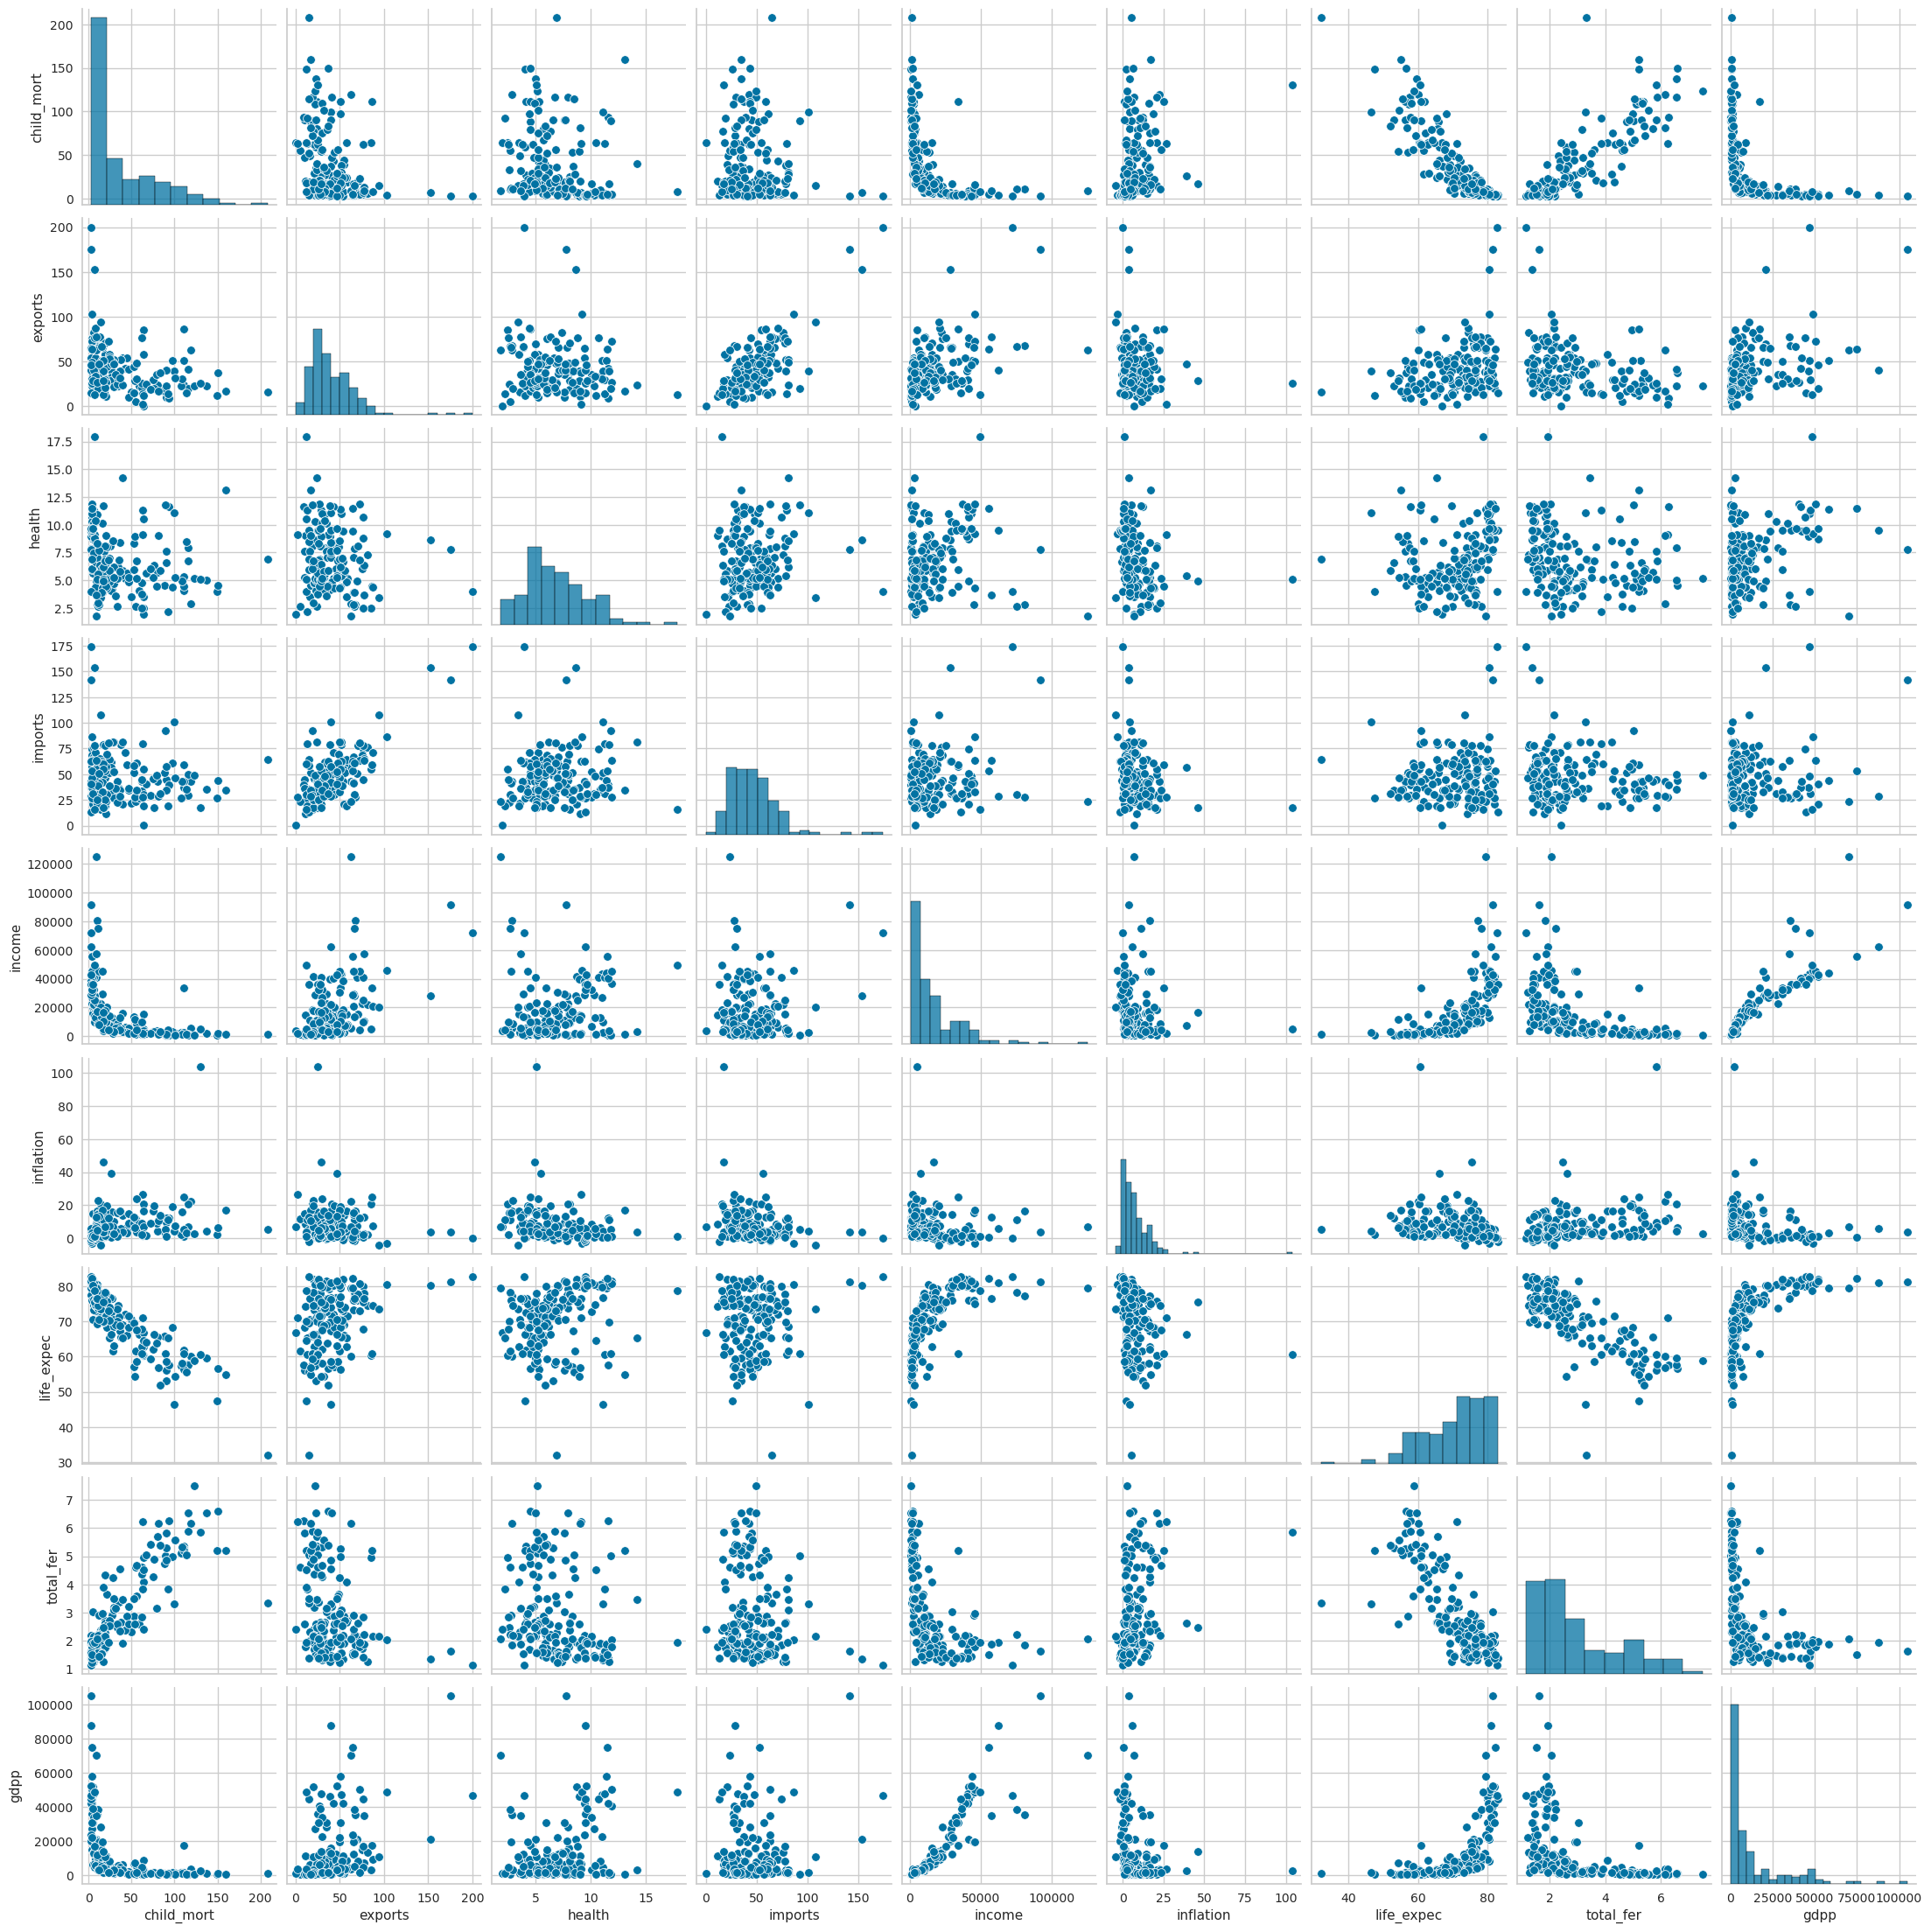

In [29]:
sns.pairplot(df_country)
plt.show()

No hay tanta relación entre los datos, pero si hay espacio para hacer clustering.

In [30]:
scaler = StandardScaler()

In [31]:
df_country_scaled = scaler.fit_transform(df_country.drop('country', axis=1))

In [39]:
df_country_scaled = pd.DataFrame(df_country_scaled, columns=df_country.columns[1:])

In [40]:
df_country_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


# Aplicando PCA

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA()

In [42]:
pca.fit(df_country_scaled)

PCA()

In [43]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

con 4 componentes principales hay buena varianza

In [48]:
df_country_scaled_pca = pca.transform(df_country_scaled)
df_country_scaled_pca = pd.DataFrame(df_country_scaled_pca)
df_country_scaled_pca

,0,1,2,3,4,5,6,7,8
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,0.254597,-0.383000,-0.415076,0.014148
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,-0.084579,-0.248919,0.221042,-0.173316
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,0.401696,0.087214,0.184162,-0.084037
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,0.547996,0.440835,0.355998,0.091339
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,0.206919,-0.241978,0.023681,-0.094270
...,...,...,...,...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748,-0.009059,0.098738,-0.521886,0.497803
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581,-0.097274,-0.206735,0.078805,0.275735
164,0.498524,1.390744,-0.238526,-1.074098,1.176081,-0.051607,0.143627,0.217590,0.036522
165,-1.887451,-0.109453,1.109752,0.056257,0.618365,0.540917,-0.060256,-0.089495,0.096049


In [49]:
df_country_scaled_pca.drop([4,5,6,7,8], axis=1, inplace=True)
df_country_scaled_pca

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


# ¿Qué se hace ahora?

Note que tenemos los mismos datos pero reprecentados en otra base y con algunas dimensiones amputadas, pero cada observación sigue ahí. Lo siguiente es aplicar los distintos algoritmos y ver cual tiene menor puntaje de silueta para escojer ese. Cada que implemente un algorítmo debe crear una columna introduciendo el cluster al que pertenece ese dato en la data original (df_country en este caso).

Despues de clusterizarlo, podria aplicar una regresión logística para encontrar la clasificación mas adecuada de los datos..